<a href="https://colab.research.google.com/github/nolfflogan/Logan-Nolff-Project-Portfolio/blob/Master/PROJECT_1_FITNESS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TREADMILL COMPANY-CARDIO GOOD FITNESS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/cardiogoodfitness.csv')

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [ ]:
cardio=df.copy()

In [ ]:
cardio.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


#QUESTION 1

In [ ]:
cardio.shape

(180, 9)

#QUESTION 2

In [ ]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


#QUESTION 3

In [ ]:
cardio['Product']=cardio['Product'].astype('category')
cardio['Gender']=cardio['Gender'].astype('category')
cardio['MaritalStatus']=cardio['MaritalStatus'].astype('category')
cardio['Fitness']=cardio['Fitness'].astype('category')


In [ ]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    category
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(4), int64(5)
memory usage: 8.4 KB


#QUESTION 4

In [ ]:
cardio.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

#QUESTION 5

In [ ]:
cardio.describe()

#remember that .describe only takes the numeric data

,Age,Education,Usage,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,53719.577778,103.194444
std,6.943498,1.617055,1.084797,16506.684226,51.863605
min,18.000000,12.000000,2.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,104581.000000,360.000000


#QUESTION 6

In [ ]:
def histogram_boxplot(data, feature,figsize=(12,7),kde=False,bins=None):

  #data:dataframe
  #feature:dataframe column
  #figsize: size of figure (default(12,7))
  #kde: density curve(default false)
  #bins: number of bins for histogram (default none)

  f2, (ax_box2,ax_hist2)=plt.subplots(
      nrows=2,sharex=True,gridspec_kw={'height_ratios':(0.25,0.75)},
      figsize=figsize)

  sns.boxplot(data=data,x=feature, ax=ax_box2,showmeans=True,color='violet')

  sns.histplot(data=data,x=feature,kde=kde,ax=ax_hist2,bins=bins,palette='winter')if bins else sns.histplot(data=data,x=feature,kde=kde,ax=ax_hist2)

  ax_hist2.axvline(data[feature].mean(),color='green',linestyle='--')
  ax_hist2.axvline(data[feature].median(),color='black',linestyle='-')



#AGE

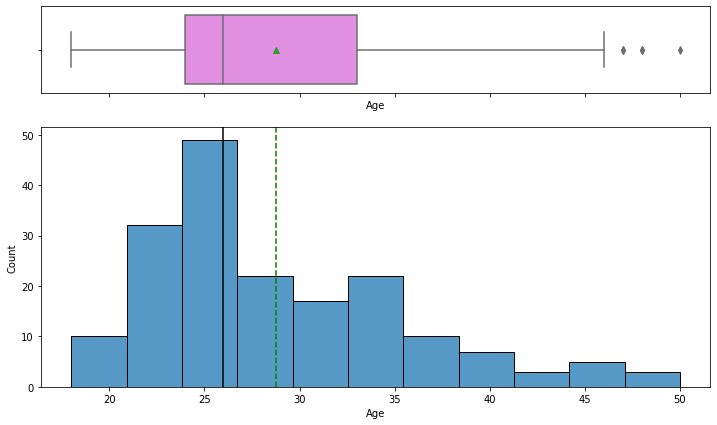

In [ ]:
histogram_boxplot(cardio,'Age')

#EDUCATION

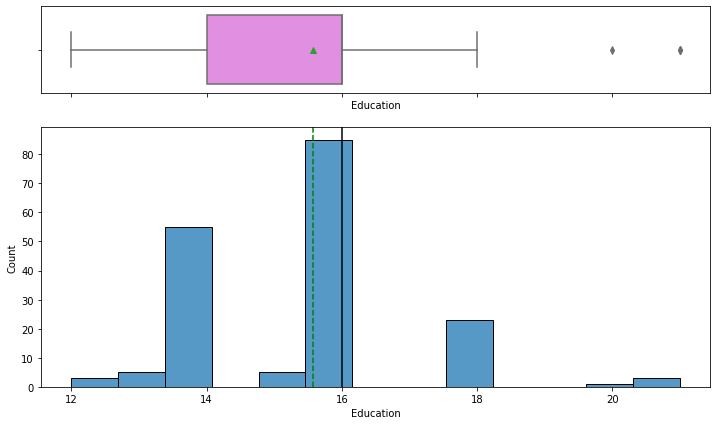

In [ ]:
histogram_boxplot(cardio,'Education')

#USAGE

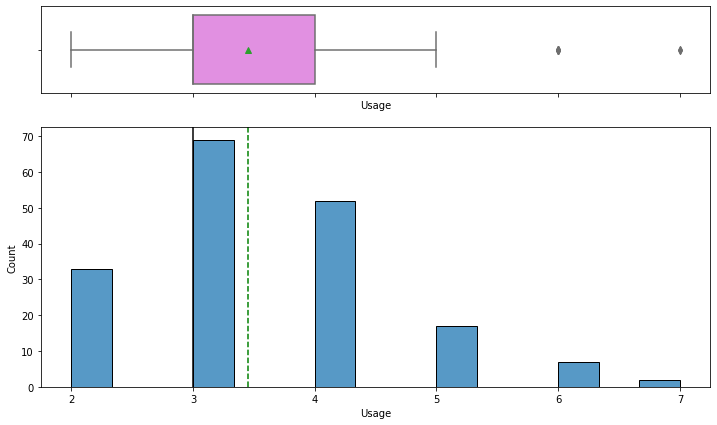

In [ ]:
histogram_boxplot(cardio,'Usage')

#INCOME

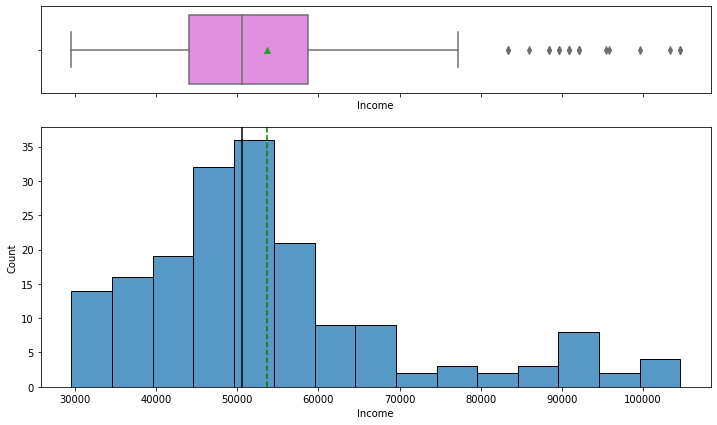

In [ ]:
histogram_boxplot(cardio,'Income')

#MILES

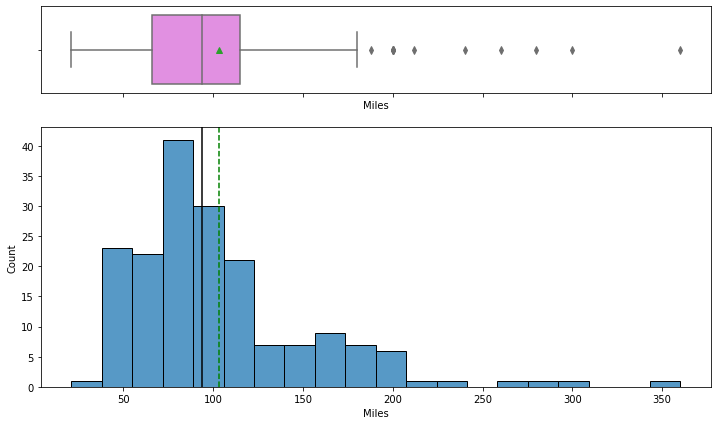

In [ ]:
histogram_boxplot(cardio,'Miles')

In [ ]:
def labeled_barplot(data,feature,perc=False,n=None):

  #data:dataframe
  #feature:dataframe column
  #perc:whether to display percents instead of count(default is false)
  #n:displays the top n category levels (default is none,i.e., display all level)

  total=len(data[feature])
  count=data[feature].nunique()
  if n is None:
    plt.figure(figsize=(count + 1,5))
  else:
    plt.figure(figsize=(n + 1, 5))

  plt.xticks(rotation=90,fontsize=15)
  ax=sns.countplot(data=data,x=feature,palette='Paired',order=data[feature].value_counts().index[:n].sort_values())

  for p in ax.patches:
    if perc == True:
      label = '{:.1f}%'.format(100*p.get_height()/total)
    else:
      label=p.get_height()

    x = p.get_x() + p.get_width()/2
    y = p.get_height()

    ax.annotate(label,(x,y),ha='center',va='center',size=12,xytext=(0,5),textcoords='offset points')

  plt.show()

#PRODUCT

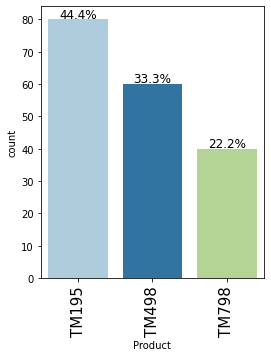

In [ ]:
labeled_barplot(cardio,'Product',perc=True)

#GENDER

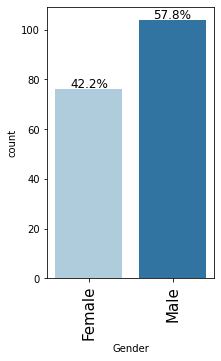

In [ ]:
labeled_barplot(cardio,'Gender',perc=True)

#MARITAL STATUS

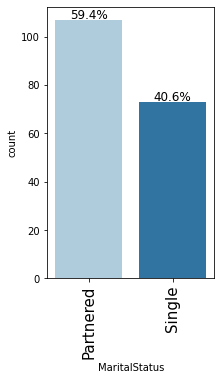

In [ ]:
labeled_barplot(cardio,'MaritalStatus',perc=True)

#FITNESS

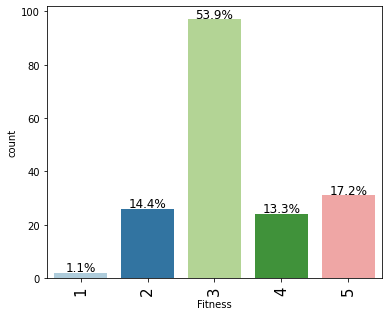

In [ ]:
labeled_barplot(cardio,'Fitness',perc=True)

#EDUCATION

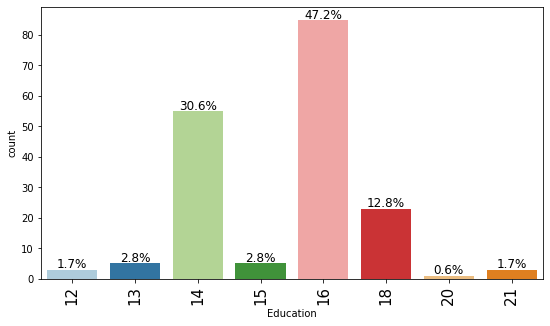

In [ ]:
labeled_barplot(cardio,'Education',perc=True)

#USAGE

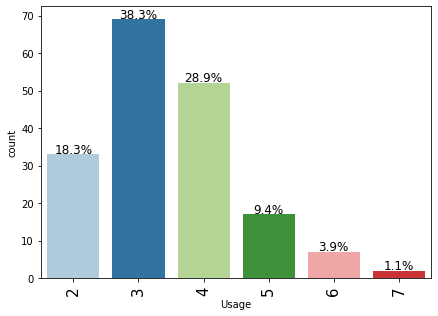

In [ ]:
labeled_barplot(cardio,'Usage',perc=True)

#QUESTION 7

#BIVARIATE ANALYSIS

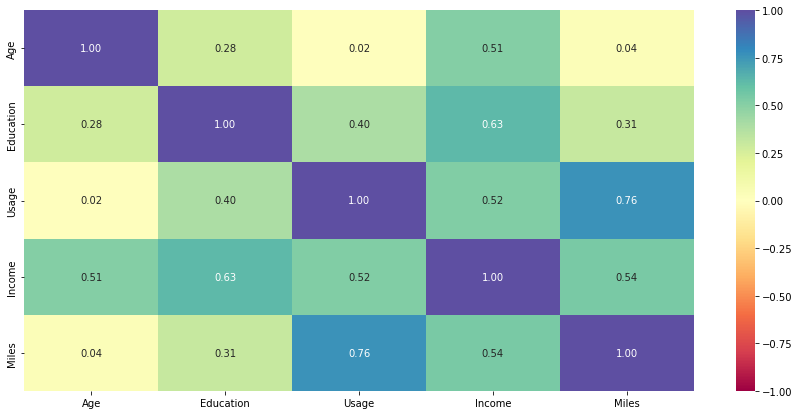

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(cardio.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='Spectral')
plt.show()

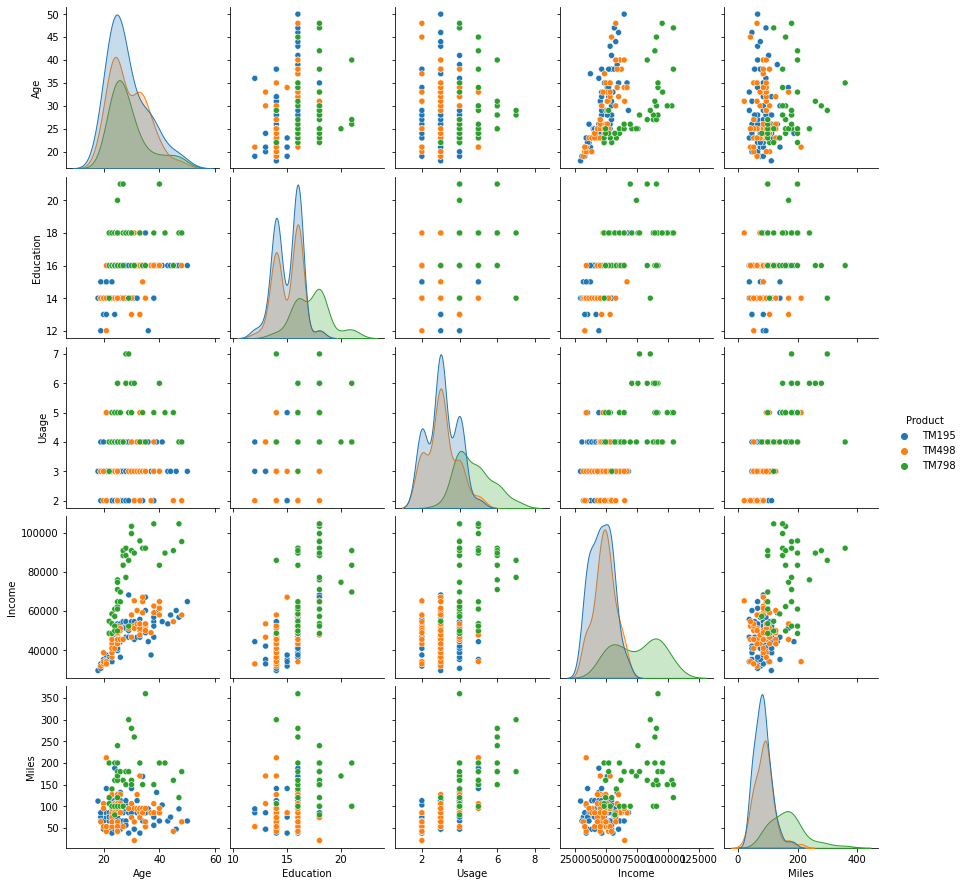

In [ ]:
sns.pairplot(data=cardio.drop(['Fitness'],axis=1),hue='Product',diag_kind='kde')
plt.show()

#PRODUCT VS AGE

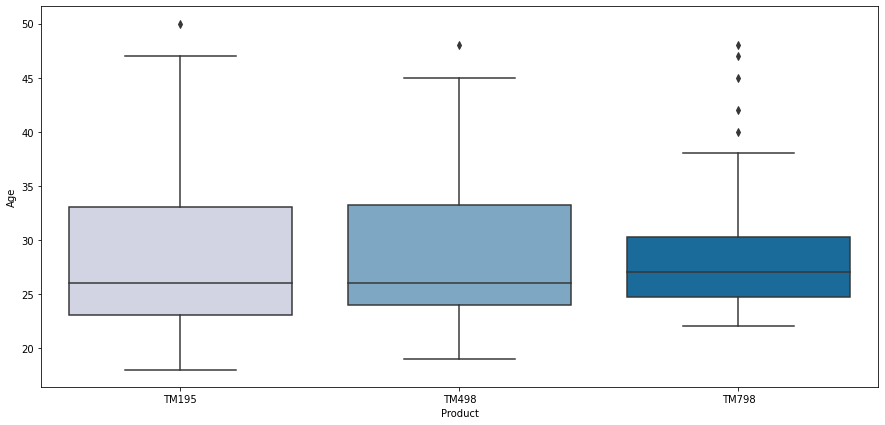

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data=cardio,x=cardio['Product'],y=cardio['Age'],palette='PuBu')
plt.show()

#PRODUCT V EDUCATION

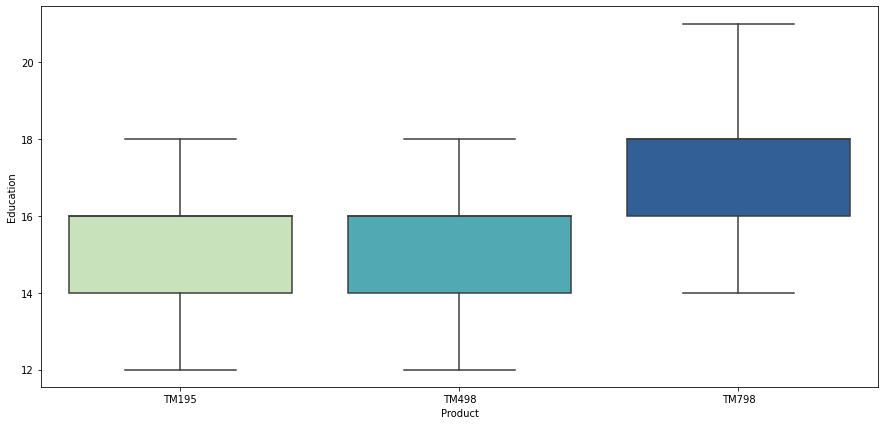

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data=cardio,x=cardio['Product'],y=cardio['Education'],palette='YlGnBu')
plt.show()

#PRODUCT V USAGE

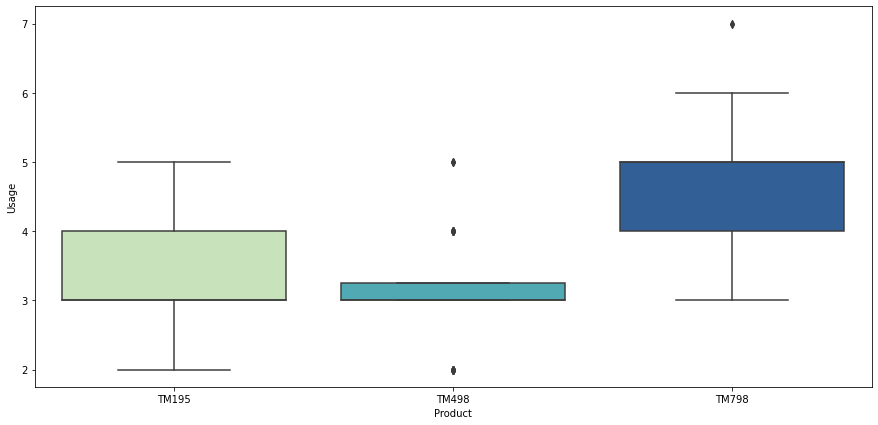

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data=cardio,x=cardio['Product'],y=cardio['Usage'],palette='YlGnBu')
plt.show()

#PRODUCT V INCOME

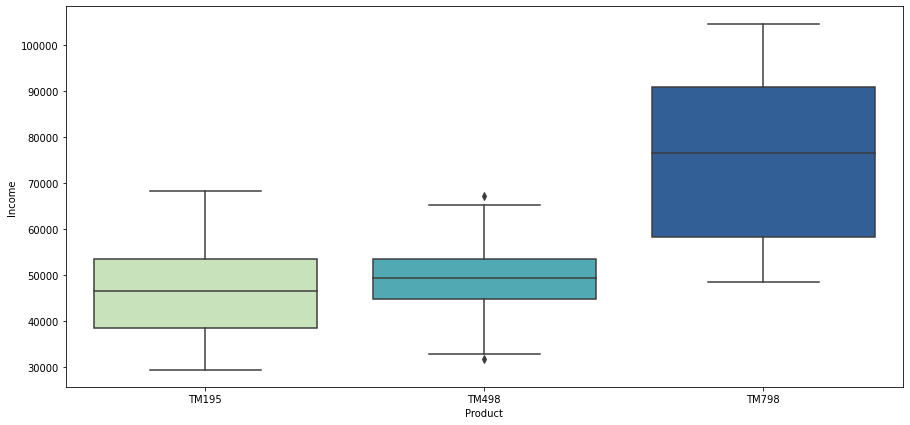

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data=cardio,x=cardio['Product'],y=cardio['Income'],palette='YlGnBu')
plt.show()

#PRODUCT V MILES

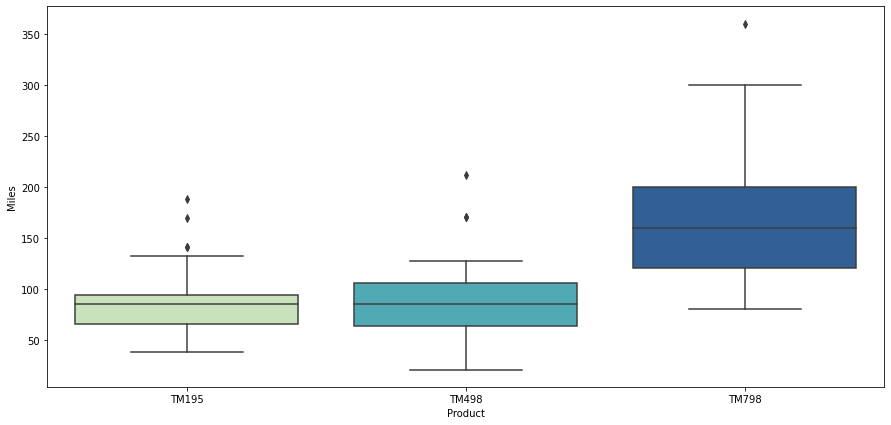

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data=cardio,x=cardio['Product'],y=cardio['Miles'],palette='YlGnBu')
plt.show()

#PRODUCT V GENDER

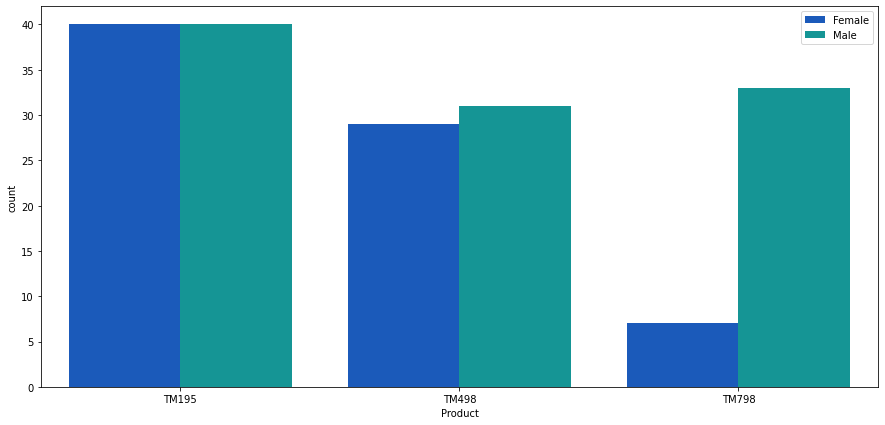

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data=cardio,x=cardio['Product'],hue=cardio['Gender'],palette='winter')
plt.legend(bbox_to_anchor=(1.00,1))
plt.show()

#PRODUCT V MARITAL STATUS

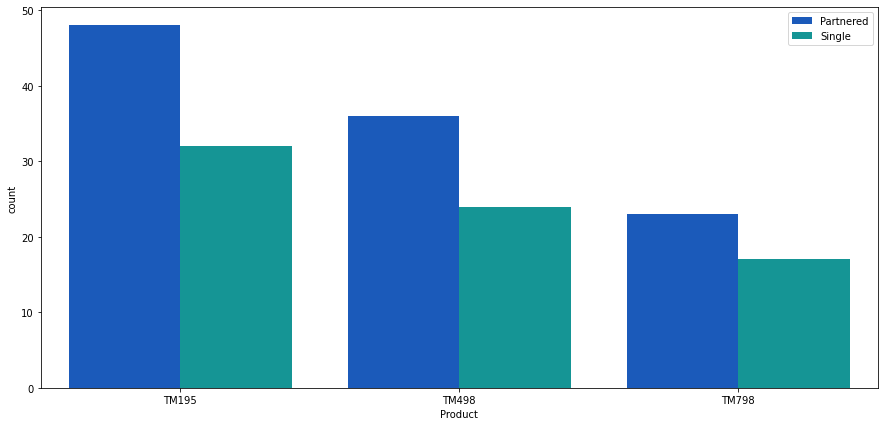

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data=cardio,x=cardio['Product'],hue=cardio['MaritalStatus'],palette='winter')
plt.legend(bbox_to_anchor=(1.00,1))
plt.show()

#PRODUCT V FITNESS

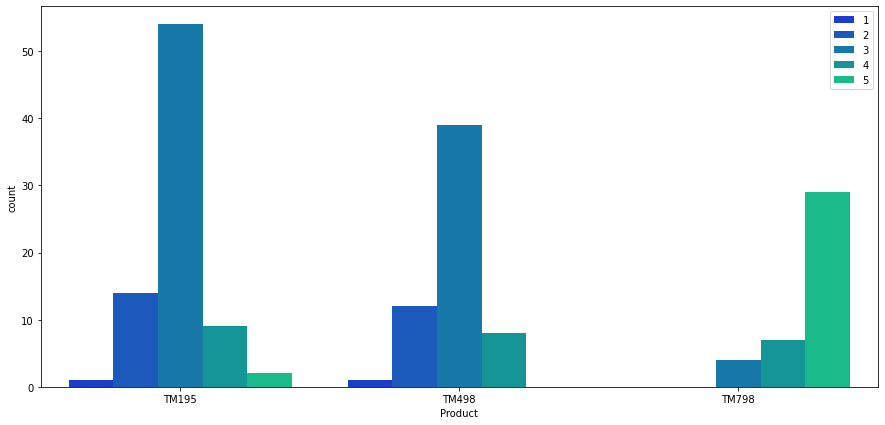

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data=cardio,x=cardio['Product'],hue=cardio['Fitness'],palette='winter')
plt.legend(bbox_to_anchor=(1.00,1))
plt.show()

#MULTIVARIATE ANALYSIS

#USAGE V GENDER V MARITAL STATUS

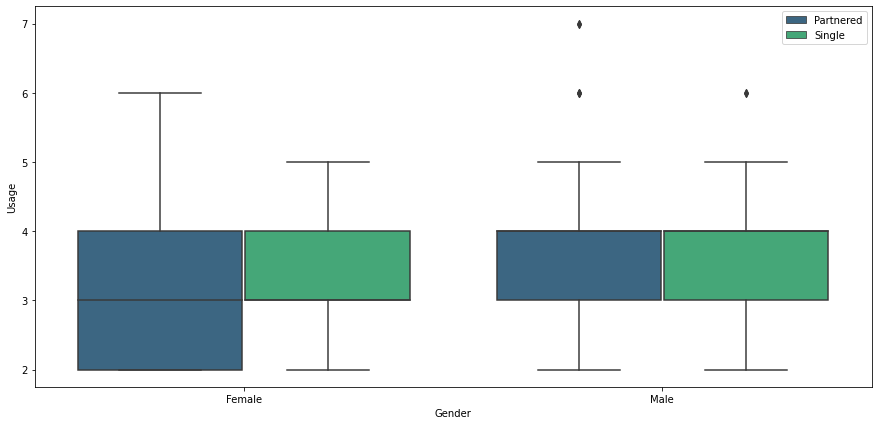

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data=cardio,x='Gender',y='Usage',hue='MaritalStatus',palette='viridis')
plt.legend(bbox_to_anchor=(1.00,1))
plt.show()

#dont necessarily need the format x=cardio['column name'] just use x='column name'

#GENDER V INCOME

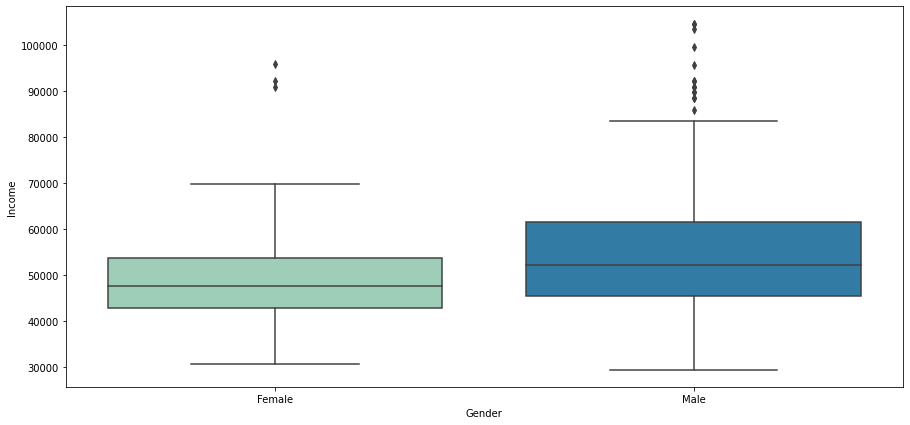

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data=cardio,x=cardio['Gender'],y=cardio['Income'],palette='YlGnBu')
plt.show()

#GENDER V INCOME V MARITAL STATUS

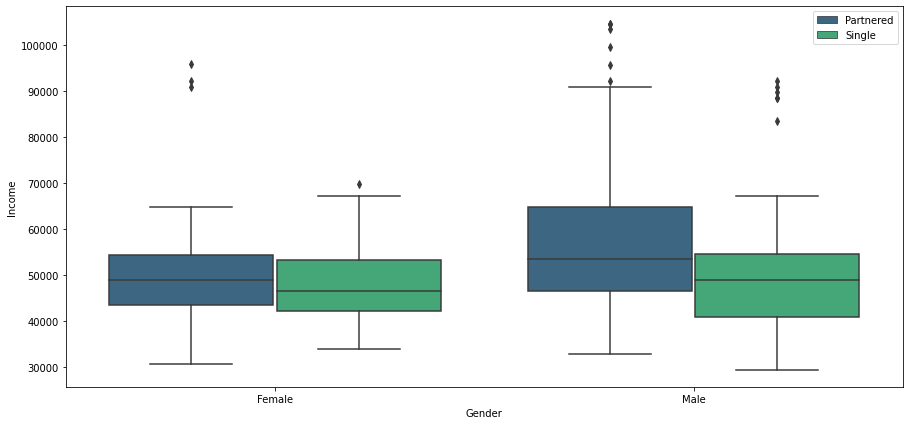

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data=cardio,x='Gender',y='Income',hue='MaritalStatus',palette='viridis')
plt.legend(bbox_to_anchor=(1.00,1))
plt.show()

#GENDER V MILES

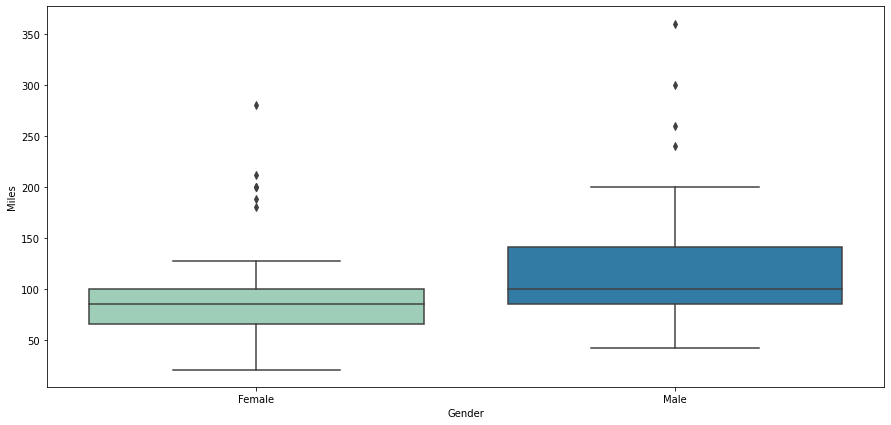

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data=cardio,x=cardio['Gender'],y=cardio['Miles'],palette='YlGnBu')
plt.show()

#GENDER V MILES V MARITAL STATUS

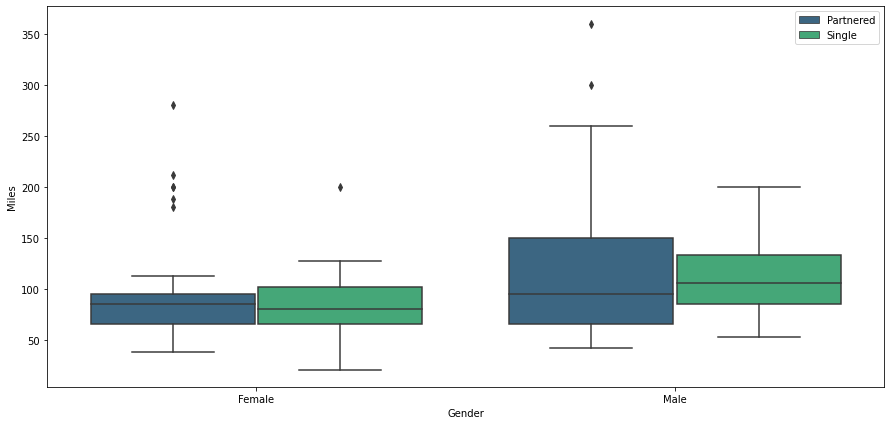

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data=cardio,x='Gender',y='Miles',hue='MaritalStatus',palette='viridis')
plt.legend(bbox_to_anchor=(1.00,1))
plt.show()

#GENDER V MILES V EDUCATION

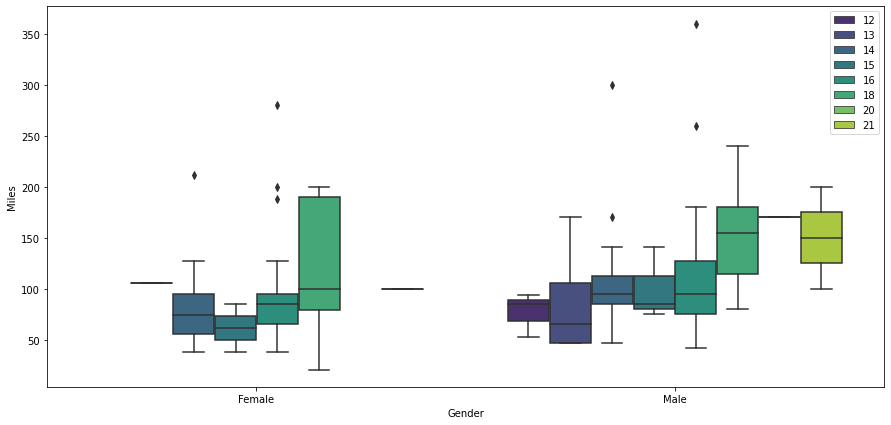

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data=cardio,x='Gender',y='Miles',hue='Education',palette='viridis')
plt.legend(bbox_to_anchor=(1.00,1))
plt.show()

#AGE V MILES V GENDER

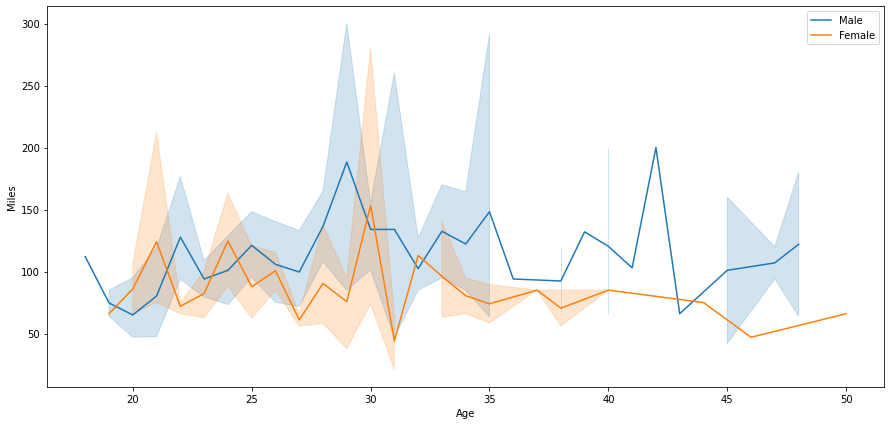

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(data = cardio, x = cardio["Age"], y = cardio["Miles"],hue=cardio["Gender"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

#AGE V MILES V MARITAL STATUS

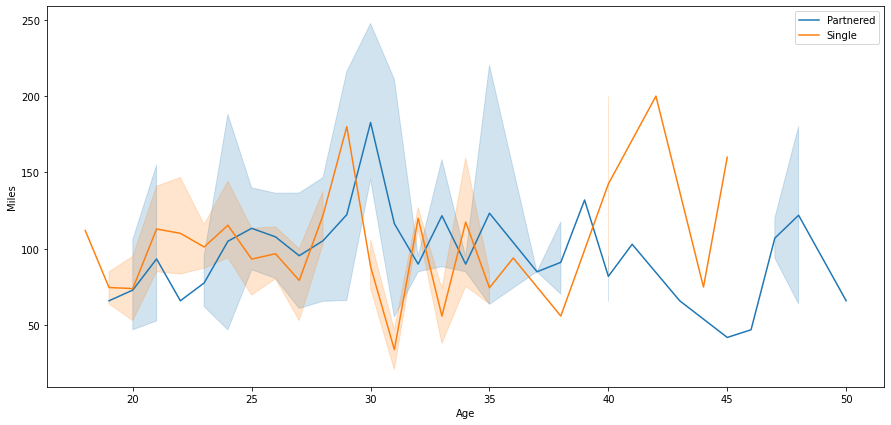

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(data = cardio, x = cardio["Age"], y = cardio["Miles"],hue=cardio["MaritalStatus"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

#AGE V INCOME V PRODUCT

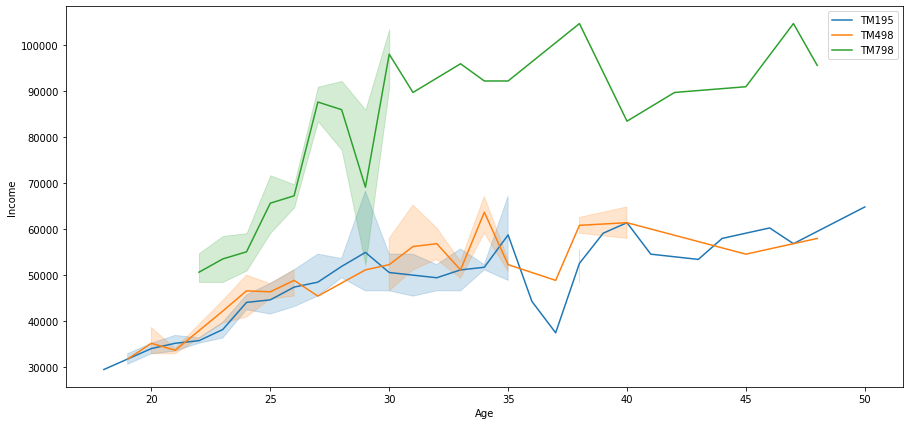

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(data = cardio, x = cardio["Age"], y = cardio["Income"],hue=cardio["Product"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

#INCOME V MILES V EDUCATION

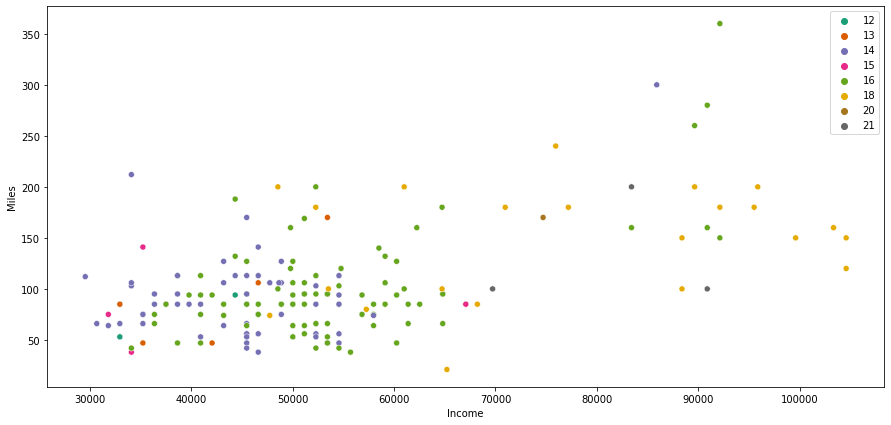

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(data = cardio, x  = cardio["Income"], y = cardio["Miles"],hue=cardio["Education"],palette="Dark2")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

#INCOME V MILES V PRODUCT

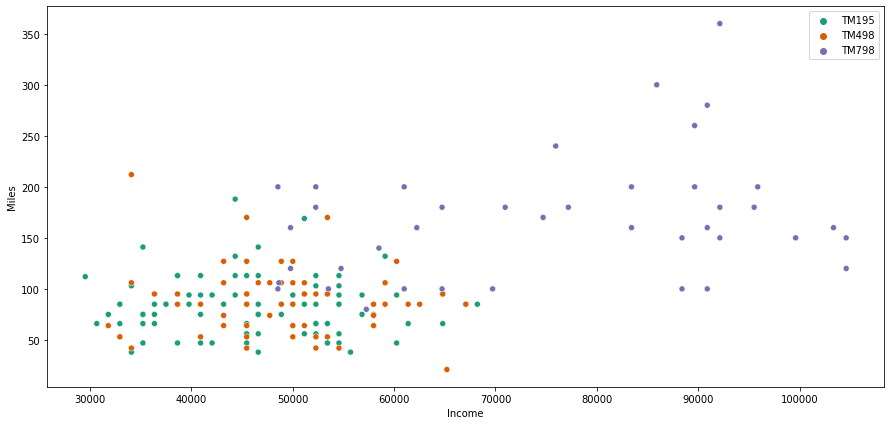

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(data = cardio, x  = cardio["Income"], y = cardio["Miles"],hue=cardio["Product"],palette="Dark2")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

#QUESTION 8

In [ ]:
cardio[cardio["Product"]=="TM195"].describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,80,80.000000,80,80.000000,80,80.000000,80.0,80.00000,80.000000
unique,1,NaN,2,NaN,2,NaN,5.0,NaN,NaN
top,TM195,NaN,Female,NaN,Partnered,NaN,3.0,NaN,NaN
freq,80,NaN,40,NaN,48,NaN,54.0,NaN,NaN
mean,NaN,28.550000,NaN,15.037500,NaN,3.087500,NaN,46418.02500,82.787500
std,NaN,7.221452,NaN,1.216383,NaN,0.782624,NaN,9075.78319,28.874102
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,NaN,29562.00000,38.000000
25%,NaN,23.000000,NaN,14.000000,NaN,3.000000,NaN,38658.00000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,NaN,46617.00000,85.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,NaN,53439.00000,94.000000


In [ ]:
cardio[cardio["Product"]=="TM498"].describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,60,60.000000,60,60.000000,60,60.000000,60.0,60.000000,60.000000
unique,1,NaN,2,NaN,2,NaN,4.0,NaN,NaN
top,TM498,NaN,Male,NaN,Partnered,NaN,3.0,NaN,NaN
freq,60,NaN,31,NaN,36,NaN,39.0,NaN,NaN
mean,NaN,28.900000,NaN,15.116667,NaN,3.066667,NaN,48973.650000,87.933333
std,NaN,6.645248,NaN,1.222552,NaN,0.799717,NaN,8653.989388,33.263135
min,NaN,19.000000,NaN,12.000000,NaN,2.000000,NaN,31836.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,NaN,44911.500000,64.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,NaN,49459.500000,85.000000
75%,NaN,33.250000,NaN,16.000000,NaN,3.250000,NaN,53439.000000,106.000000


In [ ]:
cardio[cardio["Product"]=="TM798"].describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,40,40.000000,40,40.000000,40,40.000000,40.0,40.00000,40.000000
unique,1,NaN,2,NaN,2,NaN,3.0,NaN,NaN
top,TM798,NaN,Male,NaN,Partnered,NaN,5.0,NaN,NaN
freq,40,NaN,33,NaN,23,NaN,29.0,NaN,NaN
mean,NaN,29.100000,NaN,17.325000,NaN,4.775000,NaN,75441.57500,166.900000
std,NaN,6.971738,NaN,1.639066,NaN,0.946993,NaN,18505.83672,60.066544
min,NaN,22.000000,NaN,14.000000,NaN,3.000000,NaN,48556.00000,80.000000
25%,NaN,24.750000,NaN,16.000000,NaN,4.000000,NaN,58204.75000,120.000000
50%,NaN,27.000000,NaN,18.000000,NaN,5.000000,NaN,76568.50000,160.000000
75%,NaN,30.250000,NaN,18.000000,NaN,5.000000,NaN,90886.00000,200.000000


#QUESTION 9